In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as image_utils

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [4]:
image_dir = './Jaws_labeled_images'

In [5]:
# Input image dimensions, etc.
resized_height = 224
resized_width = 224
num_channel = 3 
num_classes = 18
batch_size = 32

In [6]:
# load train images while making everything into 1 batch
#import os

# data_dir = './Jaws_labeled_images/*'
# num_images = len(os.listdir(data_dir))

train_images = image_dataset_from_directory(
    image_dir, labels='inferred', label_mode='categorical',
     color_mode='rgb', image_size=(resized_height ,
    resized_width ), batch_size=batch_size, shuffle=True, seed=42, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False,
    crop_to_aspect_ratio=False)
print(train_images)

Found 108 files belonging to 18 classes.
Using 87 files for training.


2024-04-17 20:20:17.174647: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 890 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:bd:00.0, compute capability: 8.0


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 18), dtype=tf.float32, name=None))>


In [5]:
valid_images = image_dataset_from_directory(
    image_dir, labels='inferred', label_mode='categorical',
     color_mode='rgb', image_size=(resized_height ,
    resized_width ), batch_size=32, shuffle=True, seed=42, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False,
    crop_to_aspect_ratio=False)
print(valid_images)

Found 110 files belonging to 18 classes.
Using 22 files for validation.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 18), dtype=tf.float32, name=None))>


['Carcharhinidae', 'Carcharhinus', 'Carcharhinus_brachyurus', 'Carcharhinus_leucas', 'Carcharhinus_limbatus', 'Carcharhinus_perezi', 'Carcharias_taurus', 'Carcharodon_carcharias', 'Galeocerdo_cuvier', 'Ginglymostoma_cirratum', 'Isistius_brasiliensis', 'Isurus_oxyrhinchus', 'Nebrius_ferrugineus', 'Negaprion_acutidens', 'Orectolobus', 'Orectolobus_ornatus', 'Squatina', 'Triaenodon_obesus\xa0']
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


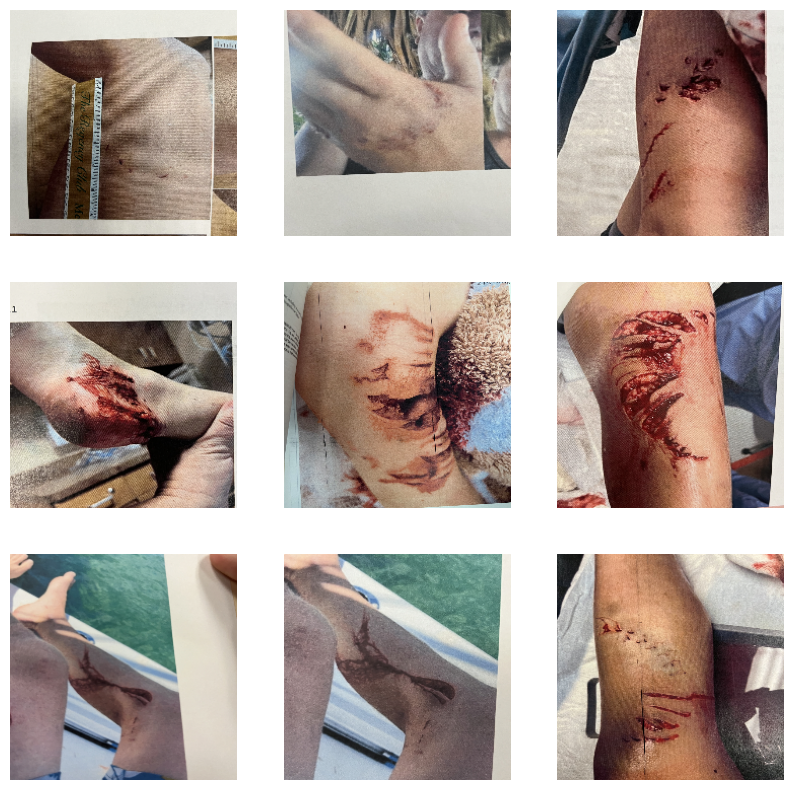

In [7]:
# Note that the images have been loaded with 3 color channels!
class_names = train_images.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(class_names[labels[i]])
    plt.axis("off")
    print(images[i].shape)

In [7]:
# Initialize empty lists to store images and labels
images = []
labels = []

# Iterate over the dataset to extract images and labels
for image_batch, label_batch in train_images:
    images.append(image_batch.numpy())
    labels.append(label_batch.numpy())

# Concatenate the lists of images and labels
image_array = np.concatenate(images, axis=0)
label_array = np.concatenate(labels, axis=0)

print("Images shape:", image_array.shape)  # Output: (88, 224, 224, 3)
print("Labels shape:", label_array.shape)  # Output: (88, 18)

Images shape: (87, 224, 224, 3)
Labels shape: (87, 18)


In [8]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)


In [ ]:
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# def augment_images(image, label):
#     image = datagen.random_transform(image)
#     return image, label
# input_shape = (224, 224, 3)

# augmented_dataset = train_images.map(augment_images)

In [ ]:
# # test script with one image
# img = load_img('./Jaws_labeled_images/Carcharhinidae/IMG_0180_Large.png')
# x = img_to_array(img)
# x = x.reshape((1,) + x.shape)
# print(x.shape)

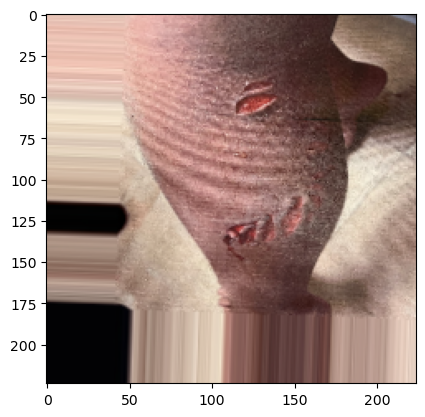

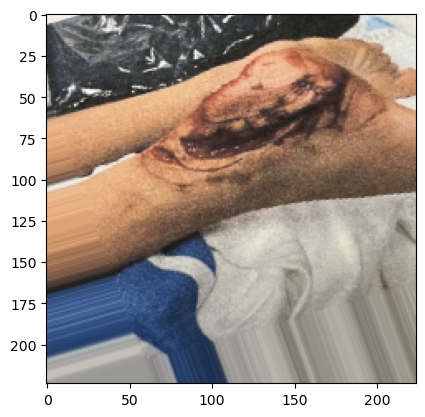

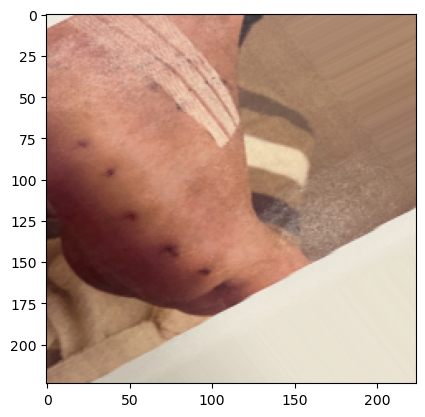

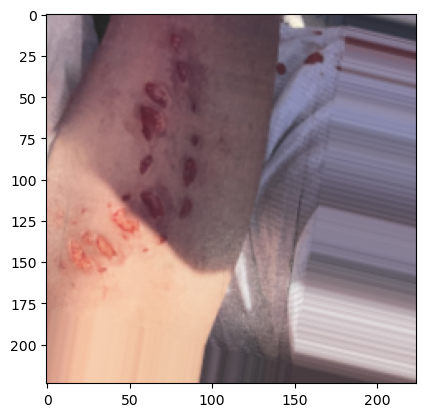

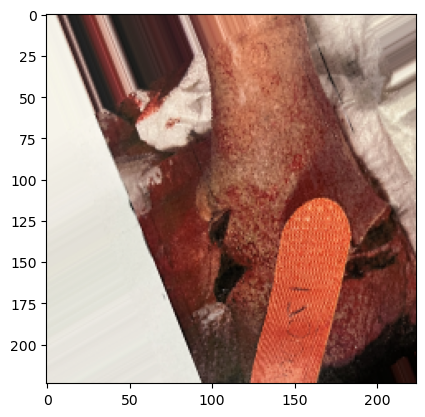

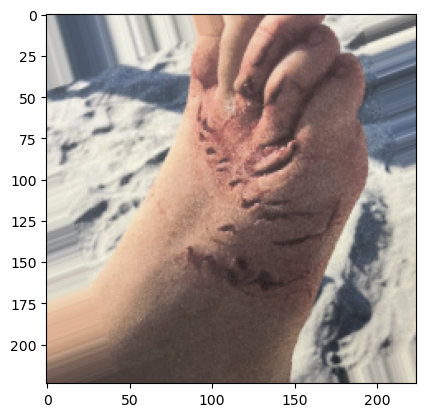

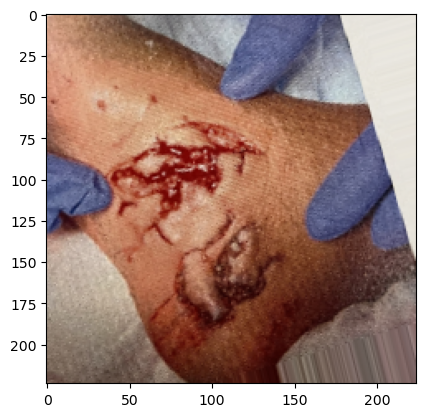

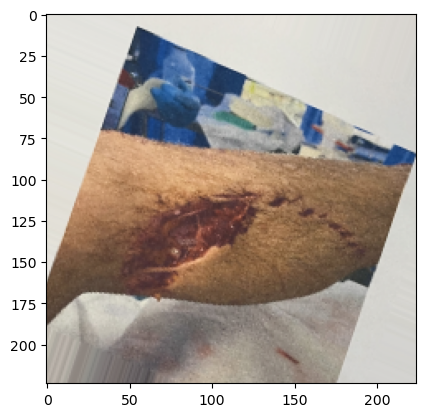

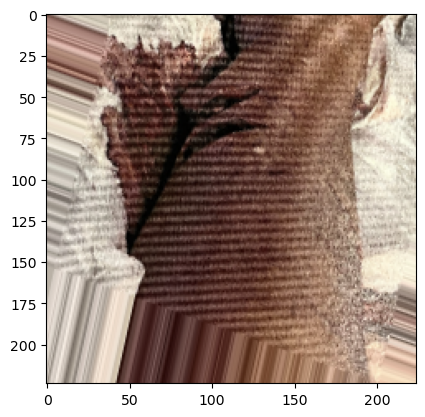

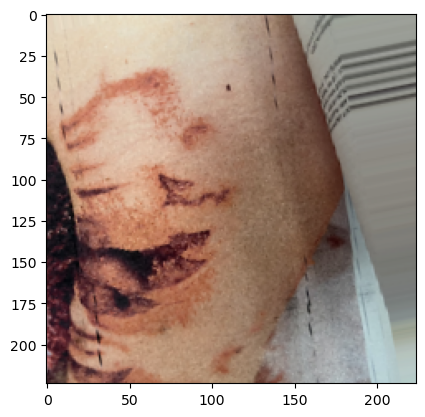

In [9]:
augmented_images = datagen.flow(image_array)

for i in range(10):
    augmented_image = next(augmented_images)[0]  # Retrieve the augmented image from the generator
    plt.imshow(augmented_image.astype('uint8')) # Plot the augmented image
    plt.show()

In [ ]:
# # # Reshape the image to (1, height, width, channels) for the datagen.flow() method
# # image = np.expand_dims(x, axis=0)

# # Generate augmented images indefinitely
# augmented_images = datagen.flow(image_array, label_array)

# x, y = next(augmented_images)
# print(x.shape, y.shape)
# # fig, ax = plt.subplots(nrows=4, ncols=8)
# for i in range(batch_size):
#     image = x[i]
# #     ax.flatten()[i].imshow(np.squeeze(image))
#     plt.imshow(image.astype('uint8'))
#     plt.show()



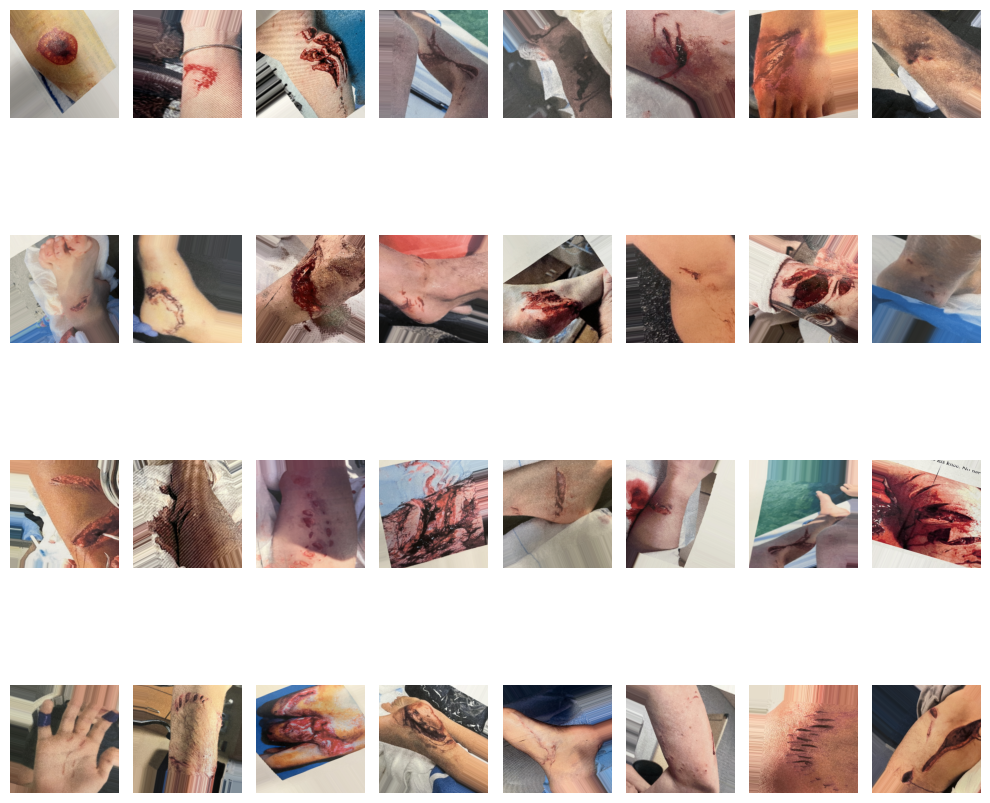

In [9]:
augmented_images = datagen.flow(image_array, label_array)

x, y = next(augmented_images)

num_rows = 4
num_cols = 8

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i in range(batch_size):
    row = i // num_cols
    col = i % num_cols
    augmented_image = x[i]
    axes[row, col].imshow(augmented_image.astype('uint8'))  # Plot the augmented image
    axes[row, col].axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()

In [30]:
# Initialize arrays to store generated images and labels
generated_images = []
generated_labels = []


num_batches = 100

for _ in range(num_batches):
    x_batch, y_batch = next(augmented_images)
    generated_images.extend(x_batch)
    generated_labels.extend(y_batch)

# Convert lists to numpy arrays
generated_images = np.array(generated_images)
generated_labels = np.array(generated_labels)

# Verify the shape of generated data
print("Shape of generated images:", generated_images.shape)
print("Shape of generated labels:", generated_labels.shape)

Shape of generated images: (2928, 224, 224, 3)
Shape of generated labels: (2928, 18)


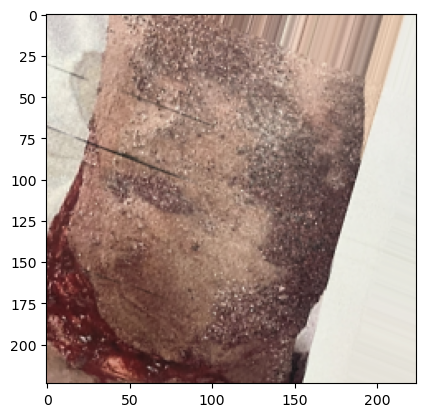

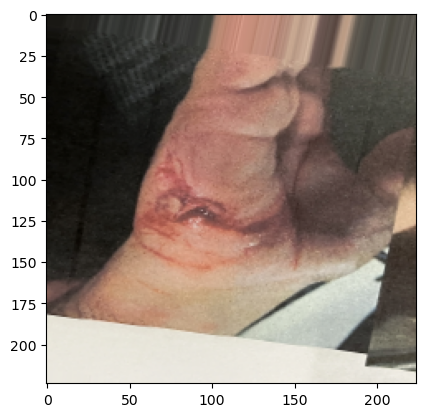

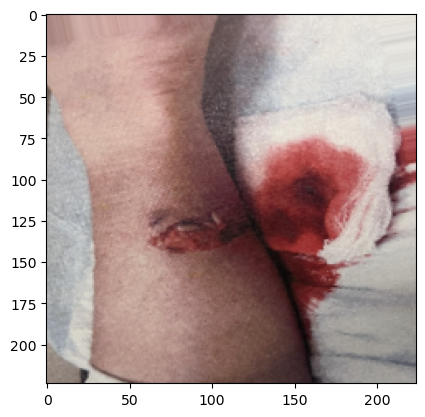

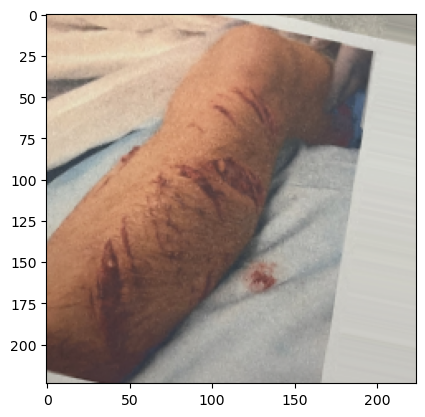

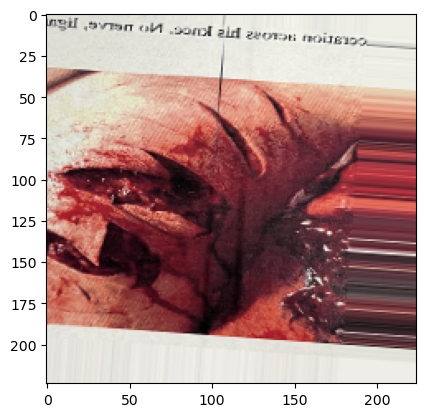

In [21]:
for i in range(5):
    plt.imshow(generated_images[i].astype('uint8')) # Plot the augmented image
    plt.show()

## Toy model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(88, activation='relu'),  # Adjust the number of neurons to match the flattened output shape
    Dense(18, activation='softmax')
])


# CNNs are more concise and have fewer parameteres than dense layers

In [15]:
# Fit the generator on the training data
datagen.fit(image_array)

# Compile the new model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
history = model.fit(generated_images, generated_labels, epochs=20, verbose=1, validation_data=valid_images)

Epoch 1/20
92/92 [==============================] - 2s 21ms/step - loss: 2.2832 - accuracy: 0.3572 - val_loss: 2.7154 - val_accuracy: 0.3636
Epoch 2/20
92/92 [==============================] - 1s 15ms/step - loss: 1.9742 - accuracy: 0.4143 - val_loss: 4.3551 - val_accuracy: 0.3182
Epoch 3/20
92/92 [==============================] - 1s 15ms/step - loss: 1.4513 - accuracy: 0.5581 - val_loss: 5.5221 - val_accuracy: 0.2727
Epoch 4/20
92/92 [==============================] - 1s 16ms/step - loss: 0.9783 - accuracy: 0.7158 - val_loss: 11.2401 - val_accuracy: 0.2273
Epoch 5/20
92/92 [==============================] - 1s 15ms/step - loss: 0.8256 - accuracy: 0.7691 - val_loss: 8.4080 - val_accuracy: 0.2727
Epoch 6/20
92/92 [==============================] - 1s 15ms/step - loss: 0.7498 - accuracy: 0.7934 - val_loss: 7.9303 - val_accuracy: 0.1818
Epoch 7/20
92/92 [==============================] - 1s 16ms/step - loss: 0.5675 - accuracy: 0.8344 - val_loss: 15.9930 - val_accuracy: 0.1818
Epoch 8/20


In [17]:
history= model.fit(augmented_images,
          epochs=20,
#          steps_per_epoch=4,
          validation_data=valid_images)

Epoch 1/20
3/3 [==============================] - 1s 442ms/step - loss: 10.0119 - accuracy: 0.1818 - val_loss: 2.6019 - val_accuracy: 0.2273
Epoch 2/20
3/3 [==============================] - 1s 421ms/step - loss: 2.6625 - accuracy: 0.2273 - val_loss: 2.4768 - val_accuracy: 0.3636
Epoch 3/20
3/3 [==============================] - 1s 440ms/step - loss: 2.8175 - accuracy: 0.2386 - val_loss: 2.2866 - val_accuracy: 0.2273
Epoch 4/20
3/3 [==============================] - 1s 389ms/step - loss: 2.6262 - accuracy: 0.3182 - val_loss: 2.3576 - val_accuracy: 0.4091
Epoch 5/20
3/3 [==============================] - 1s 387ms/step - loss: 2.5851 - accuracy: 0.3068 - val_loss: 2.7622 - val_accuracy: 0.4091
Epoch 6/20
3/3 [==============================] - 1s 400ms/step - loss: 2.7749 - accuracy: 0.3523 - val_loss: 2.5417 - val_accuracy: 0.4091
Epoch 7/20
3/3 [==============================] - 1s 417ms/step - loss: 2.6601 - accuracy: 0.3409 - val_loss: 3.1189 - val_accuracy: 0.3636
Epoch 8/20
3/3 [===

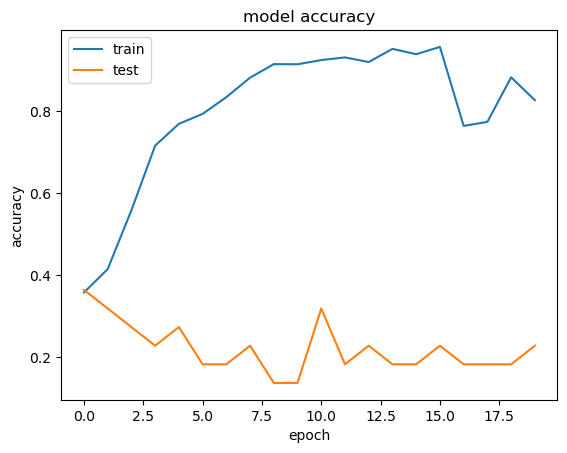

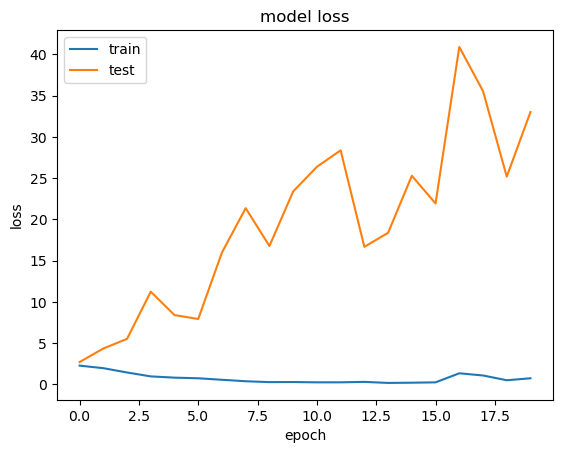

In [43]:
from helpers_plot_history import plot_history
plot_history(history)

# Below are test scripts

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define an ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load a sample image
image = np.random.random((224, 224, 3))

# Reshape the image to (1, height, width, channels) for the datagen.flow() method
image = np.expand_dims(image, axis=0)

# Generate augmented images indefinitely
augmented_images = datagen.flow(image)

# Specify how many augmented images you want to generate
num_images_to_generate = 5

# Generate and plot the specified number of augmented images
for i in range(num_images_to_generate):
    augmented_image = next(augmented_images)[0]  # Retrieve the augmented image from the generator
    plt.imshow(augmented_image.astype('uint8'))  # Plot the augmented image
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define an ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load a sample image
image = np.random.random((224, 224, 3))

# Reshape the image to (1, height, width, channels) for the datagen.flow() method
image = np.expand_dims(image, axis=0)

# Generate augmented images indefinitely
augmented_images = datagen.flow(image)

# Generate and plot 32 augmented images in an 8x4 grid plot
num_images_to_generate = 32
num_rows = 8
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 30))

for i in range(num_images_to_generate):
    row = i // num_cols
    col = i % num_cols
    augmented_image = next(augmented_images)[0]  # Retrieve the augmented image from the generator
    axes[row, col].imshow(augmented_image.astype('uint8'))  # Plot the augmented image
    axes[row, col].axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()
